In [1]:
import loess
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

def plot_prob(regressor, residuals, ax):
    res = stats.probplot(residuals, plot=ax, fit=True)

    ax.get_lines()[0].set_marker('o')
    ax.get_lines()[0].set_alpha(0.5)
    ax.set_ylabel('')
    ax.grid(True)
    ax.set_title(f'Regresor: {regressor}')


def plot_abs_residuals(regressor, estimated_y, residuals, plotRegressor , ax):
    abs_res = np.abs(residuals)
    to_est = estimated_y.reshape((len(estimated_y),1))
    plotRegressor.fit(to_est, abs_res)
    abs_res_est = plotRegressor.predict(to_est)

    order_estimates = np.argsort(estimated_y)

    ax.scatter(estimated_y, abs_res, alpha=0.5)
    ax.plot(estimated_y[order_estimates], abs_res_est[order_estimates], color='red')
    ax.set_xlabel('Fitted Values')
    ax.set_ylabel('')
    ax.grid(True)
    ax.set_title(f'Regressor: {regressor}')

def plot_residuals(regressor, dataset, residuals, plotRegressor):
    cols = ['X1','X2']

    fig, axs = plt.subplots(1, len(cols), figsize=(16,6))
    fig.suptitle(f'Regresor: {regressor}', fontsize=20)

    plt.tight_layout()
    axs[0].set_ylabel('Residuals')

    for i in range(len(cols)):
        x = dataset[[cols[i]]].to_numpy()
        plotRegressor.fit(x, residuals)
        res_est = plotRegressor.predict(x)
        order = np.argsort(x.T[0])

        axs[i].scatter(x, residuals, alpha=0.5)
        axs[i].plot(x[order], res_est[order], color='red')
        axs[i].set_xlabel(cols[i])
        axs[i].grid(True)


# DATASET 1 (sin)

In [2]:
dataset1 = pd.read_csv('../data/synthData.csv',usecols=['Y', 'X1', 'X2'])
X = dataset1[['X1', 'X2']].to_numpy()
Y = dataset1['Y'].to_numpy()

bestRegressor = loess.Loess(f=0.2, degree=2, dist=2, weight='tricubic')
worstRegressor = loess.Loess(f=0.2, degree=1, dist=2, weight='bisquare')

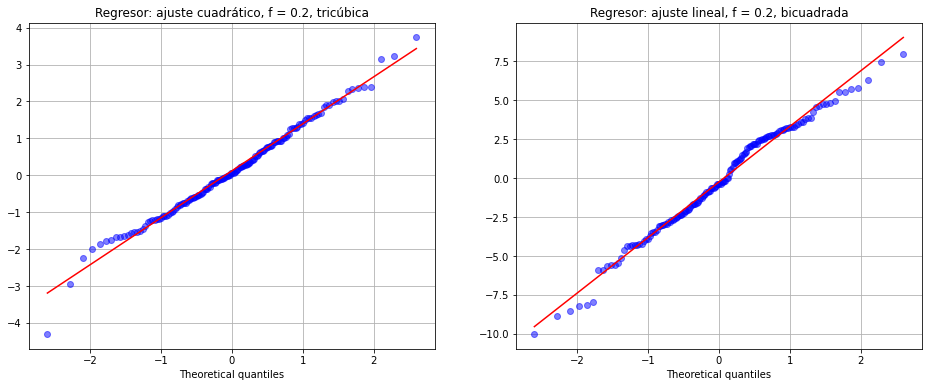

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))

bestRegressor.fit(X, Y)
estimated_Y = bestRegressor.predict(X)
residuals = estimated_Y - Y
plot_prob(bestRegressor, residuals, axs[0])

worstRegressor.fit(X, Y)
estimated_Y = worstRegressor.predict(X)
residuals = estimated_Y - Y
plot_prob(worstRegressor, residuals, axs[1])


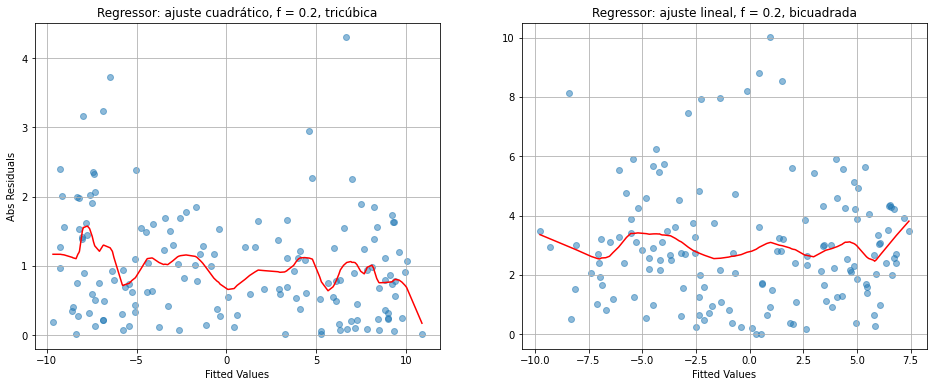

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))

abs_res_f = 0.4

#fig.suptitle('Regresor con ajuste cuadrático y norma 2 como función de distancia', fontsize=20)

plotRegressor = loess.Loess(f=0.2, degree=2, dist=2, weight='tricubic')
estimated_y = bestRegressor.predict(X)
plot_abs_residuals(bestRegressor, estimated_y, estimated_y - Y, plotRegressor, axs[0])

plotRegressor = loess.Loess(f=0.2, degree=1, dist=2, weight='bisquare')
axs[0].set_ylabel('Abs Residuals')
estimated_y = worstRegressor.predict(X)
plot_abs_residuals(worstRegressor, estimated_y, estimated_y - Y, plotRegressor, axs[1])


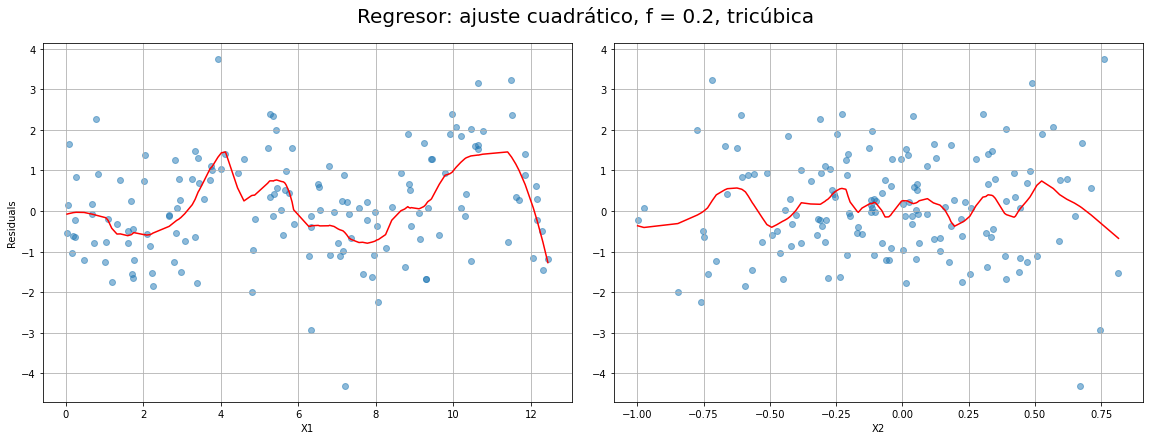

In [5]:
plotRegressor = loess.Loess(f=0.2, degree=2, dist=2, weight='tricubic')
estimated_y = bestRegressor.predict(X)
plot_residuals(bestRegressor, dataset1, estimated_y - Y, plotRegressor)


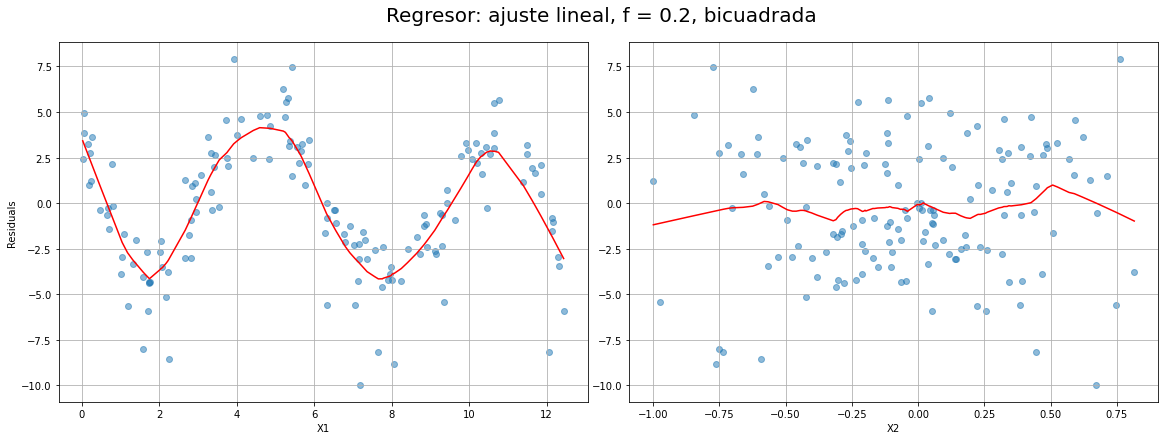

In [6]:
plotRegressor = loess.Loess(f=0.2, degree=1, dist=2, weight='bisquare')
estimated_y = worstRegressor.predict(X)
plot_residuals(worstRegressor, dataset1, estimated_y - Y, plotRegressor)

# DATASET 2 (X^2)

In [7]:
dataset2 = pd.read_csv('../data/synthData2.csv',usecols=['Y', 'X1', 'X2'])
X = dataset2[['X1', 'X2']].to_numpy()
Y = dataset2['Y'].to_numpy()

bestRegressor = loess.Loess(f=0.7, degree=2, dist=2, weight='tricubic')
worstRegressor = loess.Loess(f=0.2, degree=1, dist=2, weight='bisquare')

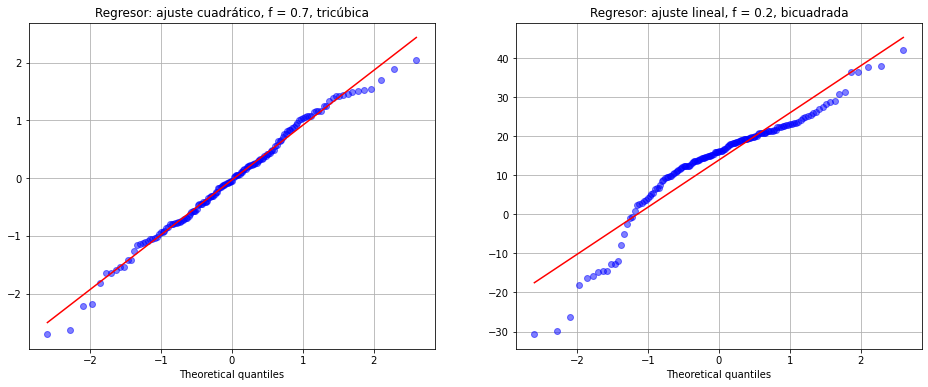

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))

bestRegressor.fit(X, Y)
estimated_Y = bestRegressor.predict(X)
residuals = estimated_Y - Y
plot_prob(bestRegressor, residuals, axs[0])

worstRegressor.fit(X, Y)
estimated_Y = worstRegressor.predict(X)
residuals = estimated_Y - Y
plot_prob(worstRegressor, residuals, axs[1])

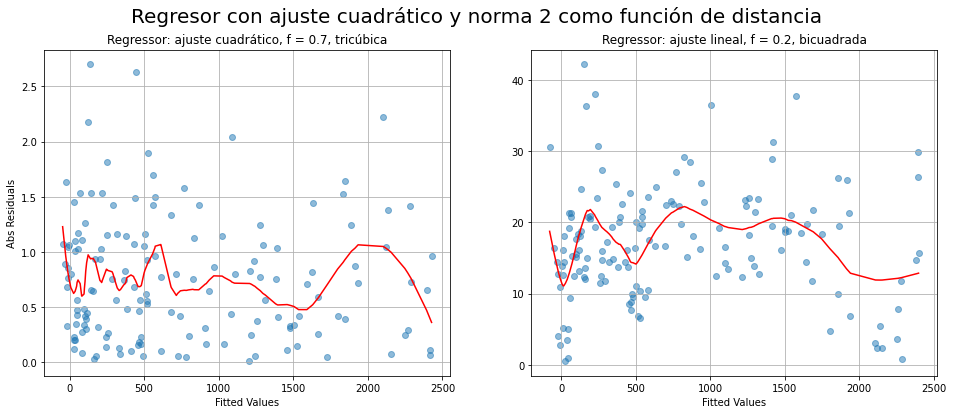

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))

abs_res_f = 0.4

# fig.suptitle('Regresor con ajuste cuadrático y norma 2 como función de distancia', fontsize=20)

plotRegressor = loess.Loess(f=0.2, degree=2, dist=2, weight='tricubic')
estimated_y = bestRegressor.predict(X)
plot_abs_residuals(bestRegressor, estimated_y, estimated_y - Y, plotRegressor, axs[0])

plotRegressor = loess.Loess(f=0.2, degree=1, dist=2, weight='bisquare')
axs[0].set_ylabel('Abs Residuals')
estimated_y = worstRegressor.predict(X)
plot_abs_residuals(worstRegressor, estimated_y, estimated_y - Y, plotRegressor, axs[1])

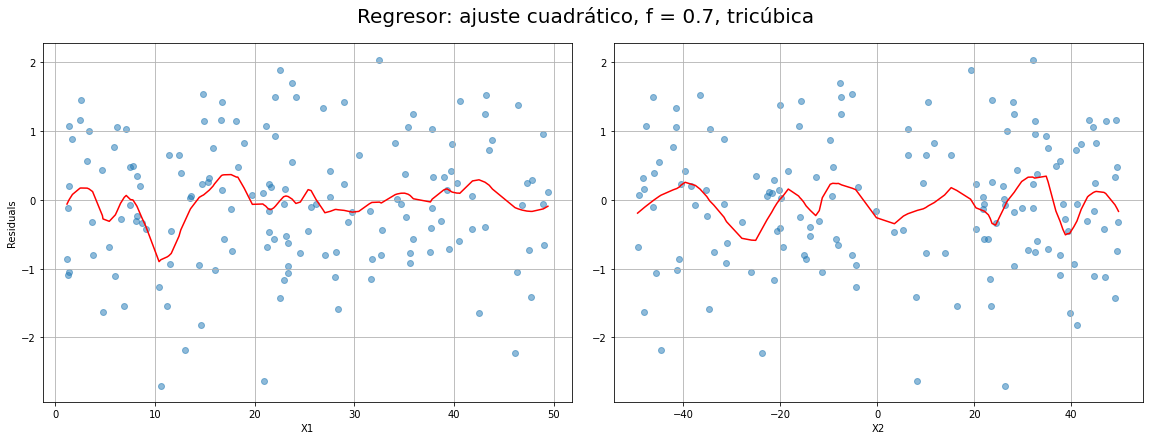

In [10]:
plotRegressor = loess.Loess(f=0.2, degree=2, dist=2, weight='tricubic')
estimated_y = bestRegressor.predict(X)
plot_residuals(bestRegressor, dataset2, estimated_y - Y, plotRegressor)


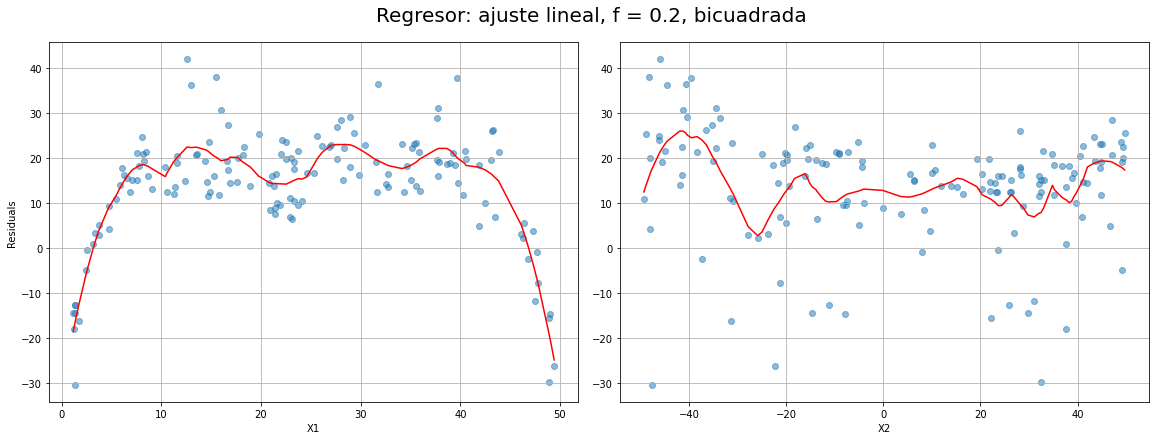

In [11]:
plotRegressor = loess.Loess(f=0.2, degree=2, dist=2, weight='tricubic')
estimated_y = worstRegressor.predict(X)
plot_residuals(worstRegressor, dataset2, estimated_y - Y, plotRegressor)